In [7]:
%run env_setup.py
%matplotlib notebook
import os
os.environ['HTTP_PROXY']='127.0.0.1:1080'

In [2]:
import lessdeep as ld

In [3]:
img_file = ld.utils.download_file('http://farm2.static.flickr.com/1422/987713710_f801e72921.jpg')

Successfully downloaded 987713710_f801e72921.jpg 75030 bytes.


<IPython.core.display.Javascript object>


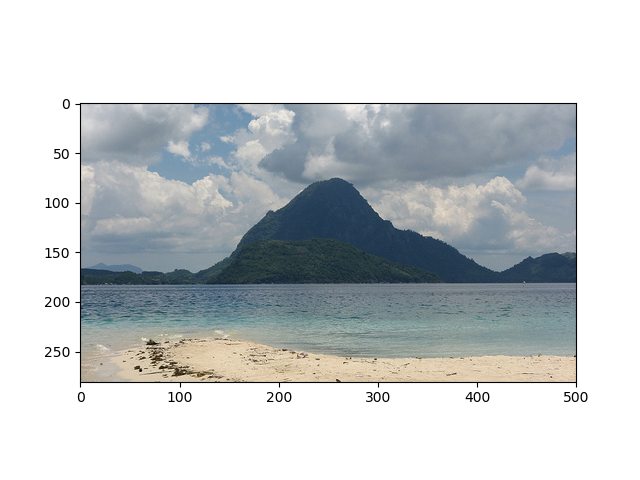

In [9]:
from matplotlib import pyplot as plt
from PIL import Image
img = Image.open(img_file)
plt.imshow(img)
plt.show()

Successfully downloaded 1280px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg 613563 bytes.


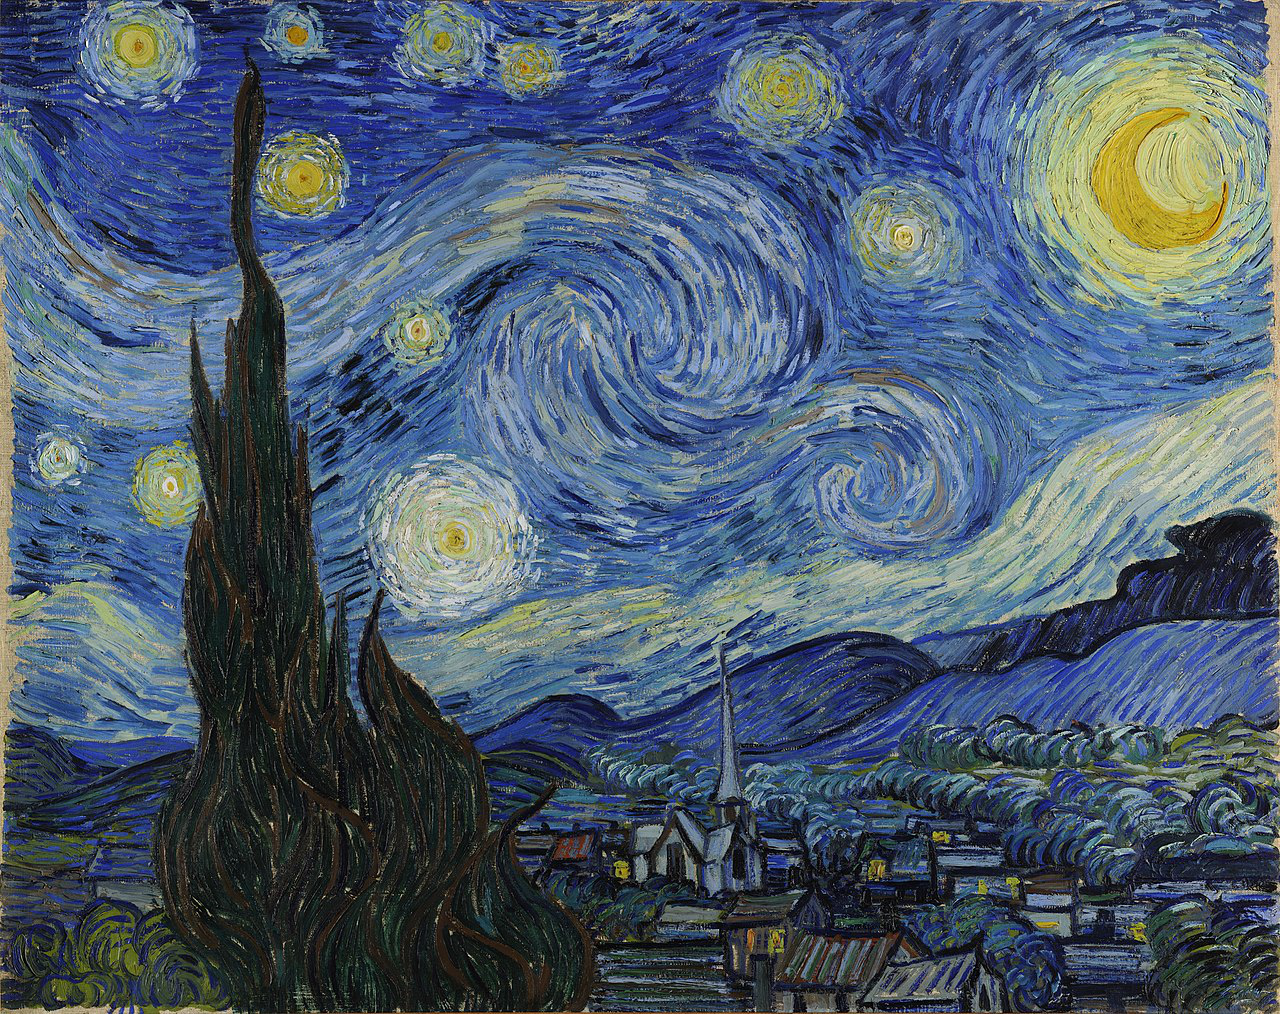

In [10]:
van_img = Image.open(ld.utils.download_file('https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1280px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg'))
van_img

In [17]:
from lessdeep.model.vgg16n import Vgg16N
import keras

vgg_avg=Vgg16N(include_top=False)
vgg_avg_layers = []
for l in vgg_avg.model.layers:
    if isinstance(l, keras.layers.MaxPool2D):
        vgg_avg_layers.append(keras.layers.AveragePooling2D((2, 2), strides=(2, 2)))
    else:
        vgg_avg_layers.append(l)
vgg_avg.model = keras.Sequential(vgg_avg_layers)
vgg_avg.compile()
vgg_avg.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
average_pooling2d_9 (Average (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
average_pooling2d_10 (Averag (None, 56, 56, 128)       0         
__________

In [18]:
conv_idx = [i for i, l in enumerate(vgg_avg.model.layers) if isinstance(l, keras.layers.Conv2D)]

In [19]:
conv_idx

[1, 2, 4, 5, 7, 8, 9, 11, 12, 13, 15, 16, 17]